# Hist 3368 Week 4 - Using Wordnet to Study Congress

The notebook below generates some visualizations of a controlled vocabulary of crime, applying the findings from Wordnet to Jane Austen and Congress.

In [20]:
import nltk, numpy, re, matplotlib
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt

### Load the Controlled vocabulary on crime that we generated earlier this week.

In [21]:
cd ~/digital-history

/users/jguldi/digital-history


You should have a file called "crime_vocab.csv" that we created in an earlier notebook using Wordnet.  Load it now.

In [22]:
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

This may take a minute.

### Load Austen Data

In [23]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [24]:
with open('senseandsensibility.txt', 'r') as myfile:
    sas_data = myfile.read().split('\n\n"I suppose you know, ma\'am, that Mr. Ferrars is married"\n\nIt _was_ Edward\n\n"Everything in such respectable condition"\n\n ')[1].split('THE END')[0].strip()
with open('emma.txt', 'r') as myfile:
    emma_data = myfile.read().split('CHAPTER I')[1].split('FINIS')[0].strip()
with open('prideandprejudice.txt', 'r') as myfile:
    pap_data = myfile.read().split('CHAPTER I')[1].split('End of the Project Gutenberg EBook of Pride and Prejudice, by Jane Austen')[0].strip()
data = [sas_data, emma_data, pap_data]

# clean up
austenwords = []
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel) # strip punctuation
    novel = re.sub('-', ' ', novel) # replace hyphens with spaces
    novelwords = novel.replace('\n', ' ').lower().split() # remove whitespace, lowercase, split into words
    austenwords += novelwords

### Find Vocab Matches in Jane Austen

In [25]:
# search for matched words
matchedwords = []
for w in austenwords:
    w = wn.morphy(w) # lemmatize it
    if w in vocab:
        matchedwords.append(w)
matchedwords
pd.Series.value_counts(matchedwords)[:5]

off        62
attempt    39
remove     31
wrong      24
liberty    19
dtype: int64

In [26]:
# collect the bigrams in the controlled vocabulary
cleanwordnetbigrams = []
for v in vocab:
    if " " in v:
        cleanwordnetbigrams.append(v)
cleanwordnetbigrams[:5]

['criminal offense',
 'criminal offence',
 'law breaking',
 'aggravated assault',
 'assault and battery']

In [27]:
# search for matched bigrams
matchedbigrams = []
from textblob import TextBlob
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel) # strip punctuation
    novel = re.sub('-', ' ', novel) # replace hyphens with spaces
    novelwords = novel.replace('\n', ' ').lower() # remove whitespace, lowercase, split into words
    bigrams = TextBlob(novelwords).ngrams(n=2)
    for bigram in bigrams: # move through each line of the *bigrams* list
        if wn.morphy(bigram[0]) is not None and wn.morphy(bigram[1]) is not None:
            bigram2 = wn.morphy(bigram[0]) + ' ' + wn.morphy(bigram[1]) # call the first word, a space, and the second word into a new string
            if bigram2 in cleanwordnetbigrams:
                matchedbigrams.append(bigram2) # save the string 
pd.Series.value_counts(matchedbigrams)[:5]

break in    2
take in     2
dtype: int64

In [28]:
# put it all together 
allcontrolledvocab = matchedwords + matchedbigrams  

# stopword out ambiguous words
ambiguouswords = ['break in', 'off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid', 'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical', 'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist = []
for v in allcontrolledvocab:
    if v not in ambiguouswords:
        finallist.append(v)
finalcount = pd.Series.value_counts(finallist)
finalcount[:5]

evil       17
offence    14
torture     6
attack      6
injury      5
dtype: int64

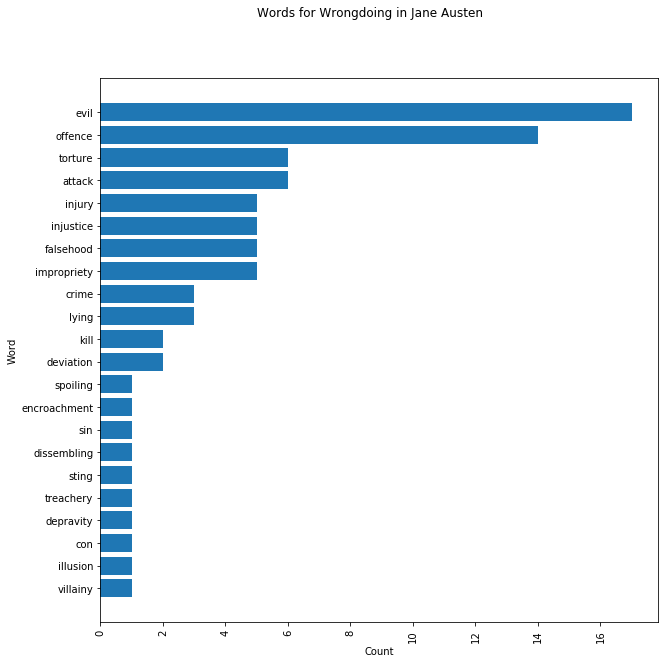

In [29]:
#######
# a well-labeled barplot
plt.figure(figsize = (10, 10)) # make it medium and square
plt.barh(finalcount.index, finalcount) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Jane Austen') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('austen-wrongdoing.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

### Load Congress Data

In [30]:
congress = pd.read_csv("congress-just-1967-2010.csv")

In [31]:
congress1 = congress[congress['year'] == 1967]
congress2 = congress[congress['year'] == 2010]

In [32]:
congress2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,speech,date,speaker,word_count,year,month,month_year
185175,185175,5926838,5926838,The clerk will please read a communication to ...,2010-01-05,The PRESIDING OFFICER,27,2010,1,2010-01-01
185176,185176,5926839,5926839,Under the previous order. the Senate stands ad...,2010-01-05,The ACTING PRESIDENT pro tempore,83,2010,1,2010-01-01
185177,185177,5926840,5926840,The Chair will lead the House in the Pledge of...,2010-01-05,The SPEAKER pro tempore,11,2010,1,2010-01-01
185178,185178,5926841,5926841,Pursuant to clause 4 of rule I. the following ...,2010-01-05,The SPEAKER pro tempore,40,2010,1,2010-01-01
185179,185179,5926842,5926842,Pursuant to clause 5(d) of rule XX. the Chair ...,2010-01-05,The SPEAKER pro tempore,21,2010,1,2010-01-01


### Clean the Data

In [33]:
# clean up speeches from 1967
congressspeeches1 = []
for speech in congress1['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower()
    congressspeeches1.append(speech)
congressspeeches1 = ' '.join(congressspeeches1)
congressspeeches1[:150]

'those who do not enjoy the privilege of the floor will please retire from the chamber mr president on the basis of an agreement reached on both sides '

In [34]:
# clean up speeches from 2010
congressspeeches2 = []
for speech in congress2['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower() # lower case 'em '
    congressspeeches2.append(speech) # save the speeches for later
congressspeeches2 = ' '.join(congressspeeches2)
congressspeeches2[:150]

'the clerk will please read a communication to the senate from the president pro mr warner thereupon assumed the tempore  chair as acting president pro'

### Try Using the Austen Code to Find Vocab Matches in Congress

The code above -- the code we have been using all week to find matches -- could *theoretically* run on the Congress dataset.  But it might crash the machine. Let's see what happens.  If the lines below crash, try following along with the lines below, which do the same thing another way.

In [ ]:
# search for matched words
congresswords1 = congressspeeches1.split()
matchedwords = []
for w in congresswords1:
    w = wn.morphy(w) # lemmatize it
    if w in vocab:
        matchedwords.append(w)
        
# find the bigrams 
matchedbigrams = []
bigrams = TextBlob(congressspeeches1).ngrams(n=2)
for bigram in bigrams: # move through each line of the *bigrams* list
        if wn.morphy(bigram[0]) is not None and wn.morphy(bigram[1]) is not None:
            bigram2 = wn.morphy(bigram[0]) + ' ' + wn.morphy(bigram[1]) # call the first word, a space, and the second word into a new string
            if bigram2 in cleanwordnetbigrams:
                matchedbigrams.append(bigram2) # save the string 
                
# put it all together
allvocabcongress1 = matchedwords+matchedbigrams

# stopword out ambiguous words
finallist = []
for v in allcontrolledvocab:
    if v not in ambiguouswords:
        finallist.append(v)
finalcount = pd.Series.value_counts(finallist)
finalcount[:5]

Your code likely crashed.  

If you received a message about the 'kernel restarting,' that means that you have lost all the variables you created up to this point.

***We're going to keep going.***

1) Next, run the code UP TO this block of code.  
2) Skip the block of code immediately above these instructions -- the one that crashed your kernel.
3) Continue on running the code below.

### Find Vocab Matches in Congress More Efficiently

Congress is bigger than Austen!  In order to get our code to run quickly, we have to use slightly more efficient code.  

In the weeks that follow, we will be learning a number of shortcuts to do things we've already learned in a more "efficient" manner.  This means that the code will talk to Python about how to allocate computer power in such a way that the code will run more swiftly and effectively over the data in question.

Let's introduce a concept that will help us understand computational efficiency:
   * Writing Data Takes Time
   * More efficient code stores the results as it goes
   
The code for matching we've written to date requires the computer to call lists of words again and again: calling up the entire list of words in the original text to execute a ".append()."  When we're working with a million words, the .append() command slows us down. The overhead of creating and extending the list slows the process down.  

Computers work more efficiently when they work only on the precise data required.  


#### Working in parallel with list comprehension.

Our first lesson in efficient code is 'list comprehension.'  List comprehension helps us to write a for-loop in such a way that the computer doesn't have to use **.append()** every time. 

Here is a for loop that we've used before:

    for word in words:
        if word in vocab:
            do something.

Now, let's write the for loop so that it can be run in parallel.

The lines below do the same as those above, but we use 'list comprehension' grammar:
    
    [word for word in words if word in vocab]

The brackets -- **[ ]** -- tell Python that we are making a list.  The grammar "for blank in blank" tells Python that we want a for-loop type of program.  Instead of using **.append()** every time to store the results in a new list, we simply harvest the results and make a new list as we go.  

With some practice, you can become adept at translating traditional for-loops into list comprehension loops, which are more efficient.

Don't fret too much about this; we'll be learning several new tricks for efficient code in the coming weeks.  So long as you can recognize list comprehension and look up how to do it, you're good to go.

#### Use list comprehension to find matched words

First, fine the controlled vocab match in words and bigrams for 1967 and plot the top instances.

*This may be slow with smaller memory, but it will be fast on JupyterLab Sessions run with Memory > 60GB*

In [35]:
# search for matched words
setvocab = set(vocab)
congresswords1 = congressspeeches1.split()
matchedwords1 = [wn.morphy(word) for word in congresswords1 if wn.morphy(word) in setvocab]
matchedwords1[:5]

['gore', 'vice', 'vice', 'vice', 'fall']

In [1]:
# we'll use a slightly different method for finding ngrams because it's faster with big data than TextBlob.ngrams()
# these lines define a new function -- zipngram -- which creates ngrams of n length. 
def zipngram(text, n=2):
    words = text.split()
    return zip(*[words[i:] for i in range(n)])

In [37]:
# search for matched bigrams
bigrams = zipngram(congressspeeches1)
matchedbigrams1= [' '.join(bigram) for bigram in bigrams if ' '.join(bigram) in setvocab]
matchedbigrams1[:5]

['aggravated assault',
 'criminal offense',
 'juvenile delinquency',
 'armed robbery',
 'juvenile delinquency']

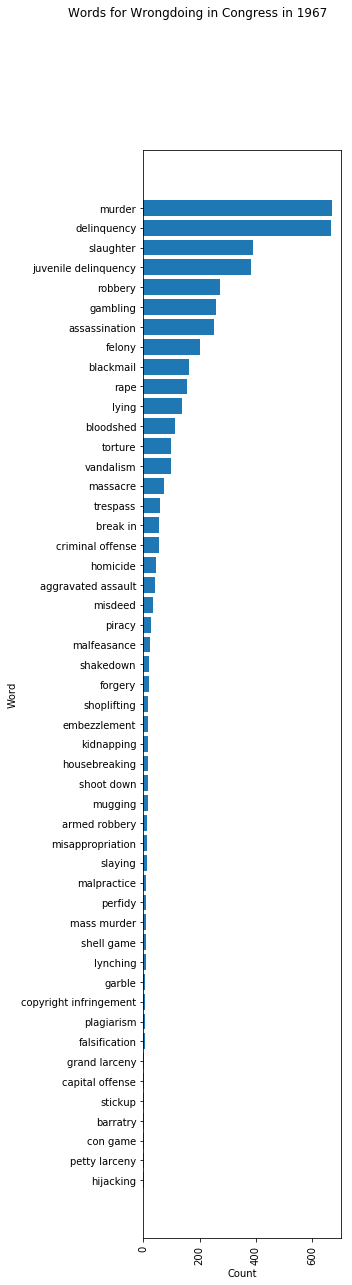

In [38]:
# put it all together and stopword out ambiguous words
allcontrolledvocab1 = matchedwords1 + matchedbigrams1
ambiguouswords = ['infringement', 'setup', 'mischief', 'foul', 'illusion','encroachment', 'misdemeanor','unfairness', 'pretense','sophistication', 'deceit',
                  'disservice','fabrication', 'equivocation','falsehood','usurpation','violation', 'injury', 'injustice', 'carnage', 'betrayal','evil', 
                  'hell', 'offense','deviation', 'impropriety','indirection','pretending','duplicity', 'delusion','trickery','shrinkage','transgression',
                  'spoiling', 'indecency','depravity','sin','slay','butchery','molestation','mortal sin','guile','abomination','malicious mischief',
                  'treason','treachery','inroad','offence','foul play','perpetration','wile','iniquity','committal','brutalization','infliction','falsify','hooliganism','impersonation',
                    'sinning','fakery', 'hustle', 'mangle','intemperance', 'foul ball','fratricide','monkey business','terrorization','pilferage','gyp',
                  'pyramiding','obscenity','holdup', 'wickedness','nonfeasance','abnormality','law breaking','mutilate','caper','ill turn','frame up',
                  'prevarication','thuggery','immorality','perversion','rascality','quackery','double dealing','con','fraud','shenanigan','roguery','high treason',
                  'cheating','off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid','misfeasance',
                  'attack','assault','sting','indiscretion','vice','crime','snatch','infraction','misapplication','kill','irregularity','flimflam','chicanery',
                  'sellout','twisting','blaze','straining','misbehavior','warp','spoilage','tort','simulation','turpitude','dereliction','mayhem', 'dishonesty',
                  'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical',
                  'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 
                  'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist1 = [w for w in allcontrolledvocab1 if w not in ambiguouswords]
finalcount1 = pd.Series.value_counts(finallist1)[:50]

#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.barh(finalcount1.index, finalcount1) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 1967') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-1967.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

Do the same thing for 2010.

In [39]:
# search for matched words
setvocab = set(vocab)
congresswords2 = congressspeeches2.split()
matchedwords2 = [wn.morphy(word) for word in congresswords2 if wn.morphy(word) in setvocab]
matchedwords2[:5]

['off', 'off', 'protection', 'job', 'kill']

In [40]:
# search for matched bigrams
bigrams = zipngram(congressspeeches2)
matchedbigrams2= [' '.join(bigram) for bigram in bigrams if ' '.join(bigram) in setvocab]
matchedbigrams2[:5]

['take in', 'ill turn', 'take in', 'take in', 'take in']

In [41]:
# put it all together and stopword out ambiguous words
allcontrolledvocab2 = matchedwords2 + matchedbigrams2
finallist2 = [w for w in allcontrolledvocab2 if w not in ambiguouswords]
finalcount2 = pd.Series.value_counts(finallist2)[:50]
finalcount2[:5]

murder      439
gambling    209
rape        198
torture     177
felony      101
dtype: int64

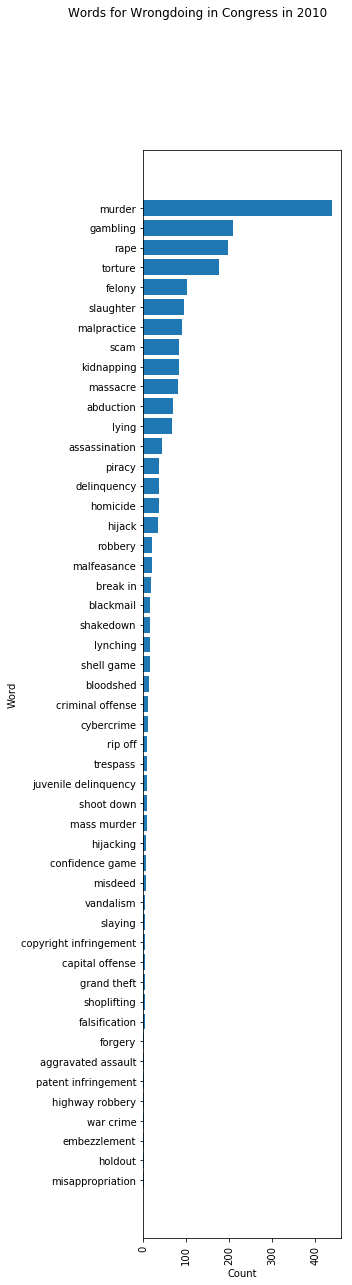

In [42]:
#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.barh(finalcount2.index, finalcount2) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 2010') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-2010.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

## Assignment

Use the visualizations included here to answer the following essay questions.  Turn in a word document with well-formatted answers.

1) What kinds of crimes concern Austen?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

2) Compare and contrast wrongdoing in Jane Austen and wrongdoing in Congress.  Why were a novelist from 1800 and lawmakers after 1967 concerned with different offenses?

3) What kinds of crimes concerned Congress in 1967?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

4) What kinds of crimes concerned Congress in 2010?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

5) Compare and contrast wrongdoing in Congress in 1980 with wrongdoing in Congress in 1989. Be specific. Write about as many words as possible. What might explain this historical change of focus?

